# FEEED
**Fe**ature **E**xtraction for **E**vent-**D**ata

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from tqdm import tqdm
from feeed import extract_features

## Feature extraction
### Feature extraction for one single event dataset (Sepsis)

The parameter 'INPUT_PATH' specifies the path to the event dataset location in memory.

Output is a dictionary including a key and value for every feature extracted.

In [2]:
import warnings 
warnings.filterwarnings('ignore')

INPUT_PATH = 'test_logs/Sepsis.xes'
sepsis_features=extract_features(INPUT_PATH)
print("Extracted ", len(sepsis_features), " features")


parsing log, completed traces ::   0%|          | 0/1050 [00:00<?, ?it/s]

     INFO: Sepsis.xes starting at 4, simple_stats from simple_stats took 0:00:00.017286 sec, next trace_length...
     INFO: Sepsis.xes starting at 33, trace_length from trace_length took 0:00:00.030458 sec, next trace_variant...
     INFO: Sepsis.xes starting at 44, trace_variant from trace_variant took 0:00:00.207416 sec, next activities...
     INFO: Sepsis.xes starting at 56, activities from activities took 0:00:00.142714 sec, next start_activities...
     INFO: Sepsis.xes starting at 68, start_activities from start_activities took 0:00:01.835419 sec, next end_activities...
     INFO: Sepsis.xes starting at 80, end_activities from end_activities took 0:00:01.827983 sec, next eventropies...
     INFO: Sepsis.xes starting at 96, eventropies from eventropies took 0:00:03.096306 sec, next epa_based...
     INFO: Sepsis.xes starting at 104, epa_based from epa_based took 0:00:02.795225 sec, next time_based...
     INFO: Sepsis.xes starting at 180, time_based from time_based took 0:00:02.

### Feature extraction for multiple event-logs
By especifying ['complexity'], we select **complexity features** only: 'normalized_variant_entropy', 'sequence_entropy', 'normalized_sequence_entropy', 'sequence_entropy_linear_forgetting', 'normalized_sequence_entropy_linear_forgetting', 'sequence_entropy_exponential_forgetting', 'normalized_sequence_entropy_exponential_forgetting'

The output dictionaries can be concatenated to a dataframe:

In [4]:
from feeed.utils.sort_alphanumeric import sort_files

path = "test_logs"
combined_features = pd.DataFrame()

print("Extracting features")

file_names = tqdm(sort_files(os.listdir(path)))
print("FILENAMES:", [name for name in file_names if name.endswith(".xes")])#sort_files(os.listdir(path)))#filter(lambda x: x.endswith(".xes") ,
print(file_names)

for file in file_names:
    if file.endswith(".xes"):
        features = extract_features(path+"/"+file, ['epa_based'])
        temp = pd.DataFrame.from_dict([features])
        combined_features = pd.concat([combined_features, temp], ignore_index=True)

combined_features

Extracting features


100%|████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 10053.46it/s]

FILENAMES: ['BPI_Challenge_2013_closed_problems.xes', 'Sepsis.xes']
100%|█████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 4269.45it/s]


parsing log, completed traces ::   0%|          | 0/1487 [00:00<?, ?it/s]

     INFO: BPI_Challenge_2013_closed_problems.xes starting at 9, epa_based from epa_based took 0:00:01.264194 sec, last feature.
SUCCESSFULLY: 8 features for BPI_Challenge_2013_closed_problems.xes took 0:00:01.264404 sec.


parsing log, completed traces ::   0%|          | 0/1050 [00:00<?, ?it/s]

     INFO: Sepsis.xes starting at 9, epa_based from epa_based took 0:00:03.137584 sec, last feature.
SUCCESSFULLY: 8 features for Sepsis.xes took 0:00:03.137734 sec.


,log,epa_normalized_sequence_entropy,epa_normalized_sequence_entropy_exponential_forgetting,epa_normalized_sequence_entropy_linear_forgetting,epa_normalized_variant_entropy,epa_sequence_entropy,epa_sequence_entropy_exponential_forgetting,epa_sequence_entropy_linear_forgetting,epa_variant_entropy
0,BPI_Challenge_2013_closed_problems,0.310940,0.288383,0.286515,0.705383,18231.591304,16909.014827,16799.485682,3502.264471
1,Sepsis,0.522343,0.299505,0.219365,0.695759,76528.679475,43880.539191,32139.284589,40624.493298


### Feature extraction for benchmark event data
We extracted features for multiple event data from benchmark.


In [6]:
benchmark_features = pd.read_csv("../tag/data/bpic_features.csv", index_col=None)

#benchmark_features = benchmark_features.drop(['Unnamed: 0'], axis=1)
print(benchmark_features.shape)
#print(benchmark_features.columns.tolist())
print(len(benchmark_features), " Event-Logs: ", benchmark_features.sort_values('log')['log'].unique())
benchmark_features.head()

(27, 104)
27  Event-Logs:  ['BPIC15_1' 'BPIC15_2' 'BPIC15_3' 'BPIC15_4' 'BPIC15_5'
 'BPI_Challenge_2012' 'BPI_Challenge_2013_closed_problems'
 'BPI_Challenge_2013_incidents' 'BPI_Challenge_2013_open_problems'
 'BPI_Challenge_2017' 'BPI_Challenge_2017_Offer_log' 'BPI_Challenge_2018'
 'BPI_Challenge_2019' 'CoSeLoG_WABO_1' 'CoSeLoG_WABO_2' 'CoSeLoG_WABO_3'
 'CoSeLoG_WABO_4' 'CoSeLoG_WABO_5' 'DomesticDeclarations' 'Hospital_log'
 'InternationalDeclarations' 'PermitLog' 'PrepaidTravelCost'
 'Receipt_WABO_CoSeLoG' 'RequestForPayment'
 'Road_Traffic_Fine_Management_Process' 'Sepsis_Cases_Event_Log']


,log,n_traces,n_unique_traces,ratio_unique_traces_per_trace,trace_len_min,trace_len_max,trace_len_mean,trace_len_median,trace_len_mode,trace_len_std,...,normalized_variant_entropy,sequence_entropy,normalized_sequence_entropy,sequence_entropy_linear_forgetting,normalized_sequence_entropy_linear_forgetting,sequence_entropy_exponential_forgetting,normalized_sequence_entropy_exponential_forgetting,eventropy_global_block_flattened,eventropy_lempel_ziv_flattened,eventropy_prefix_flattened
0,Sepsis_Cases_Event_Log,1050,846,0.805714,3,185,14.489524,13,8,11.470475,...,0.695759,76528.679475,0.522343,32139.284589,0.219365,43880.539191,0.299505,NaN,NaN,NaN
1,CoSeLoG_WABO_1,937,916,0.977588,2,95,41.562433,43,40,16.678023,...,0.646697,247624.836550,0.601566,120536.031135,0.292824,154887.768087,0.376276,18.361,3.276,13.885
2,BPIC15_4,1053,1049,0.996201,1,116,44.912631,44,42,14.947644,...,0.652985,307408.386201,0.603866,181190.709276,0.355927,210160.971650,0.412835,NaN,NaN,NaN
3,CoSeLoG_WABO_3,1087,1032,0.949402,3,124,41.215271,41,46,15.780335,...,0.654296,286147.436740,0.596367,133447.483488,0.278121,171025.962113,0.356439,NaN,NaN,NaN
4,RequestForPayment,6886,89,0.012925,1,20,5.343596,5,5,1.467384,...,0.703735,73131.560994,0.189048,37745.014467,0.097572,45934.933996,0.118744,NaN,NaN,NaN


In [7]:
import pandas as pd
import os
import json

# Define the directory containing the JSON files
directory = '../tag/output/features/real_event_logs_time/'

# Initialize an empty dataframe
df = pd.DataFrame()
# Iterate over the files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.json'):
        i_path = os.path.join(directory, filename)
        with open(i_path) as f:
            #temp_df = pd.read_json(i_path, orient='records')
            #print(temp_df)
            data = json.load(f)
            temp_df = pd.DataFrame([data])
            df = pd.concat([df, temp_df])
#df = df.set_index('log')
benchmark_time_features = pd.merge(benchmark_features, df)
#benchmark_features = pd.merge(benchmark_features, df)
print(benchmark_features.shape, benchmark_features.sort_values('log')['log'].unique())
df.head()



(27, 104) ['BPIC15_1' 'BPIC15_2' 'BPIC15_3' 'BPIC15_4' 'BPIC15_5'
 'BPI_Challenge_2012' 'BPI_Challenge_2013_closed_problems'
 'BPI_Challenge_2013_incidents' 'BPI_Challenge_2013_open_problems'
 'BPI_Challenge_2017' 'BPI_Challenge_2017_Offer_log' 'BPI_Challenge_2018'
 'BPI_Challenge_2019' 'CoSeLoG_WABO_1' 'CoSeLoG_WABO_2' 'CoSeLoG_WABO_3'
 'CoSeLoG_WABO_4' 'CoSeLoG_WABO_5' 'DomesticDeclarations' 'Hospital_log'
 'InternationalDeclarations' 'PermitLog' 'PrepaidTravelCost'
 'Receipt_WABO_CoSeLoG' 'RequestForPayment'
 'Road_Traffic_Fine_Management_Process' 'Sepsis_Cases_Event_Log']


,log,accumulated_time_time_min,accumulated_time_time_max,accumulated_time_time_mean,accumulated_time_time_median,accumulated_time_time_mode,accumulated_time_time_std,accumulated_time_time_variance,accumulated_time_time_q1,accumulated_time_time_q3,...,within_day_time_iqr,within_day_time_geometric_mean,within_day_time_geometric_std,within_day_time_harmonic_mean,within_day_time_skewness,within_day_time_kurtosis,within_day_time_coefficient_variation,within_day_time_entropy,within_day_time_skewness_hist,within_day_time_kurtosis_hist
0,BPIC15_2,0.0,1.145628e+08,7.195987e+06,3888000.00,0.0,1.090649e+07,1.189515e+14,691200.000,8380800.000,...,44011.000,52550.521152,1.527808,47979.360126,-0.026888,-1.728454,0.388055,10.621648,1.921282,2.753268
0,Receipt_WABO_CoSeLoG,0.0,2.383254e+07,2.379880e+05,130.27,0.0,9.204637e+05,8.472534e+11,33.736,10406.875,...,15654.131,38006.713071,1.276102,36885.485682,0.301650,-0.556238,0.240037,9.028104,-0.042383,-1.794202
0,BPIC15_3,0.0,1.306368e+08,4.338386e+06,2371126.00,0.0,7.671908e+06,5.885817e+13,897372.000,4698477.000,...,45520.000,50338.135137,1.558831,45638.821875,0.091144,-1.758850,0.414249,10.908731,1.718812,2.140095
0,BPI_Challenge_2019,0.0,2.217935e+09,3.151367e+06,682320.00,0.0,2.334700e+07,5.450824e+14,480.000,2899680.000,...,42120.000,40554.292135,2.416683,0.000000,-0.006671,-0.811969,0.449193,14.167672,0.283161,-1.133420
0,RequestForPayment,0.0,3.507780e+07,5.049570e+05,132234.00,0.0,1.227825e+06,1.507555e+12,10.000,607301.250,...,23279.250,41185.497033,1.411680,37709.095132,0.077411,-0.506198,0.304423,10.465119,0.487789,-1.478166


### Similarity search for event data through extracted features

In [8]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.impute import SimpleImputer

logs = benchmark_features['log']
benchmark_features_num = benchmark_features.set_index('log')
benchmark_features_num = benchmark_features_num.select_dtypes(exclude=['object'])

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_features = imputer_mean.fit_transform(benchmark_features_num)

features_similarity = pd.DataFrame(pairwise_distances(imputed_features, metric='cosine'), columns=logs, index= logs)
features_similarity.index.name=None
features_similarity.columns.name=None
print(features_similarity.shape)
features_similarity

(27, 27)


,Sepsis_Cases_Event_Log,CoSeLoG_WABO_1,BPIC15_4,CoSeLoG_WABO_3,RequestForPayment,BPI_Challenge_2017_Offer_log,BPIC15_5,BPI_Challenge_2013_closed_problems,Receipt_WABO_CoSeLoG,CoSeLoG_WABO_5,...,InternationalDeclarations,BPI_Challenge_2013_incidents,BPIC15_3,BPIC15_2,BPI_Challenge_2017,Road_Traffic_Fine_Management_Process,CoSeLoG_WABO_4,DomesticDeclarations,BPI_Challenge_2013_open_problems,BPIC15_1
Sepsis_Cases_Event_Log,0.000000,0.784065,0.770807,0.744357,0.368366,0.055985,0.769430,0.004185,0.020731,0.777272,...,0.141623,0.010677,0.725644,0.814978,0.013270,0.052205,0.790465,0.358535,0.028851,0.767161
CoSeLoG_WABO_1,0.784065,0.000000,0.004523,0.005253,0.800015,0.904373,0.002198,0.865942,0.838369,0.002560,...,0.797295,0.893405,0.008692,0.005442,0.898845,0.904741,0.005008,0.812592,0.825440,0.000807
BPIC15_4,0.770807,0.004523,0.000000,0.015111,0.837591,0.884268,0.000524,0.854061,0.816626,0.001487,...,0.811145,0.874673,0.014535,0.003689,0.877971,0.884581,0.000725,0.845563,0.826163,0.006566
CoSeLoG_WABO_3,0.744357,0.005253,0.015111,0.000000,0.710163,0.875722,0.010167,0.822434,0.809697,0.008466,...,0.726694,0.860014,0.002306,0.021176,0.868608,0.875947,0.014517,0.728618,0.765680,0.006416
RequestForPayment,0.368366,0.800015,0.837591,0.710163,0.000000,0.419385,0.815818,0.354361,0.437547,0.801925,...,0.080683,0.426498,0.690912,0.888552,0.469308,0.420536,0.832499,0.012181,0.209612,0.799811
BPI_Challenge_2017_Offer_log,0.055985,0.904373,0.884268,0.875722,0.419385,0.000000,0.886079,0.057843,0.012744,0.896366,...,0.147108,0.029650,0.858200,0.922897,0.045390,0.000095,0.905927,0.360584,0.093904,0.886558
BPIC15_5,0.769430,0.002198,0.000524,0.010167,0.815818,0.886079,0.000000,0.851928,0.818944,0.000507,...,0.798286,0.875675,0.010239,0.004209,0.880005,0.886400,0.000935,0.825703,0.818447,0.004085
BPI_Challenge_2013_closed_problems,0.004185,0.865942,0.854061,0.822434,0.354361,0.057843,0.851928,0.000000,0.026785,0.859045,...,0.136482,0.008869,0.802487,0.899680,0.011502,0.053821,0.873036,0.347387,0.022319,0.849242
Receipt_WABO_CoSeLoG,0.020731,0.838369,0.816626,0.809697,0.437547,0.012744,0.818944,0.026785,0.000000,0.829457,...,0.164027,0.008139,0.791797,0.857354,0.015307,0.010956,0.838880,0.397647,0.070177,0.820399
CoSeLoG_WABO_5,0.777272,0.002560,0.001487,0.008466,0.801925,0.896366,0.000507,0.859045,0.829457,0.000000,...,0.794264,0.885684,0.007563,0.006775,0.890944,0.896741,0.000832,0.813631,0.820106,0.005469


In [14]:
links = features_similarity.stack().reset_index()
#links.index(dmf['log'])
links.columns = ['var1', 'var2', 'value']
links['sca_value'] = (links['value'] - links['value'].min()) / (links['value'].max() - links['value'].min())   

filtered_features = pd.DataFrame()
for log in logs:
    filtered_features = pd.concat([filtered_features,links[links['var1']==log].nsmallest(2, 'value')], ignore_index=True)
 
filtered_features=filtered_features.loc[(filtered_features['var1'] != filtered_features['var2'])]

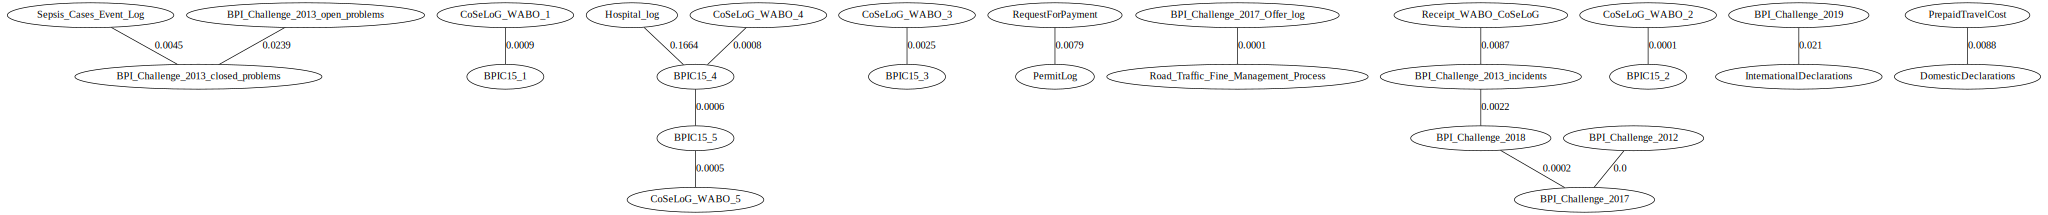

In [15]:
import graphviz as gv

#filtered_features['sca_value'] = (filtered_features['value'] - filtered_features['value'].min()) / (filtered_features['value'].max() - filtered_features['value'].min())   
filtered_features['nodes']=filtered_features.apply(lambda x: (x['var1'], x['var2']), axis=1)
e_l = filtered_features[['nodes','sca_value']].set_index('nodes').transpose().to_dict(orient='records')[0]

g = gv.Graph(format="png", strict=True)
for k, v in e_l.items():
    g.node(k[0], fontsize="15")
    g.edge(k[0], k[1], len=str(v), label=str(round(v, 4)), fontsize="15")
g
#g.render('similarity_top3_102', view = True)

In [11]:
filtered_features.sort_values('value')

,var1,var2,value,sca_value,nodes
31,BPI_Challenge_2012,BPI_Challenge_2017,0.000021,0.000022,"(BPI_Challenge_2012, BPI_Challenge_2017)"
64,BPI_Challenge_2017,BPI_Challenge_2012,0.000021,0.000022,"(BPI_Challenge_2017, BPI_Challenge_2012)"
67,Road_Traffic_Fine_Management_Process,BPI_Challenge_2017_Offer_log,0.000095,0.000102,"(Road_Traffic_Fine_Management_Process, BPI_Cha..."
16,BPI_Challenge_2017_Offer_log,Road_Traffic_Fine_Management_Process,0.000095,0.000102,"(BPI_Challenge_2017_Offer_log, Road_Traffic_Fi..."
34,CoSeLoG_WABO_2,BPIC15_2,0.000130,0.000139,"(CoSeLoG_WABO_2, BPIC15_2)"
61,BPIC15_2,CoSeLoG_WABO_2,0.000130,0.000139,"(BPIC15_2, CoSeLoG_WABO_2)"
49,BPI_Challenge_2018,BPI_Challenge_2017,0.000161,0.000172,"(BPI_Challenge_2018, BPI_Challenge_2017)"
65,BPI_Challenge_2017,BPI_Challenge_2018,0.000161,0.000172,"(BPI_Challenge_2017, BPI_Challenge_2018)"
50,BPI_Challenge_2018,BPI_Challenge_2012,0.000188,0.000201,"(BPI_Challenge_2018, BPI_Challenge_2012)"
32,BPI_Challenge_2012,BPI_Challenge_2018,0.000188,0.000201,"(BPI_Challenge_2012, BPI_Challenge_2018)"


### Extracted features value distribution in benchmark datasets

27 ['Sepsis_Cases_Event_Log' 'CoSeLoG_WABO_1' 'BPIC15_4' 'CoSeLoG_WABO_3'
 'RequestForPayment' 'BPI_Challenge_2017_Offer_log' 'BPIC15_5'
 'BPI_Challenge_2013_closed_problems' 'Receipt_WABO_CoSeLoG'
 'CoSeLoG_WABO_5' 'BPI_Challenge_2012' 'CoSeLoG_WABO_2' 'PermitLog'
 'BPI_Challenge_2019' 'Hospital_log' 'PrepaidTravelCost'
 'BPI_Challenge_2018' 'InternationalDeclarations'
 'BPI_Challenge_2013_incidents' 'BPIC15_3' 'BPIC15_2' 'BPI_Challenge_2017'
 'Road_Traffic_Fine_Management_Process' 'CoSeLoG_WABO_4'
 'DomesticDeclarations' 'BPI_Challenge_2013_open_problems' 'BPIC15_1']


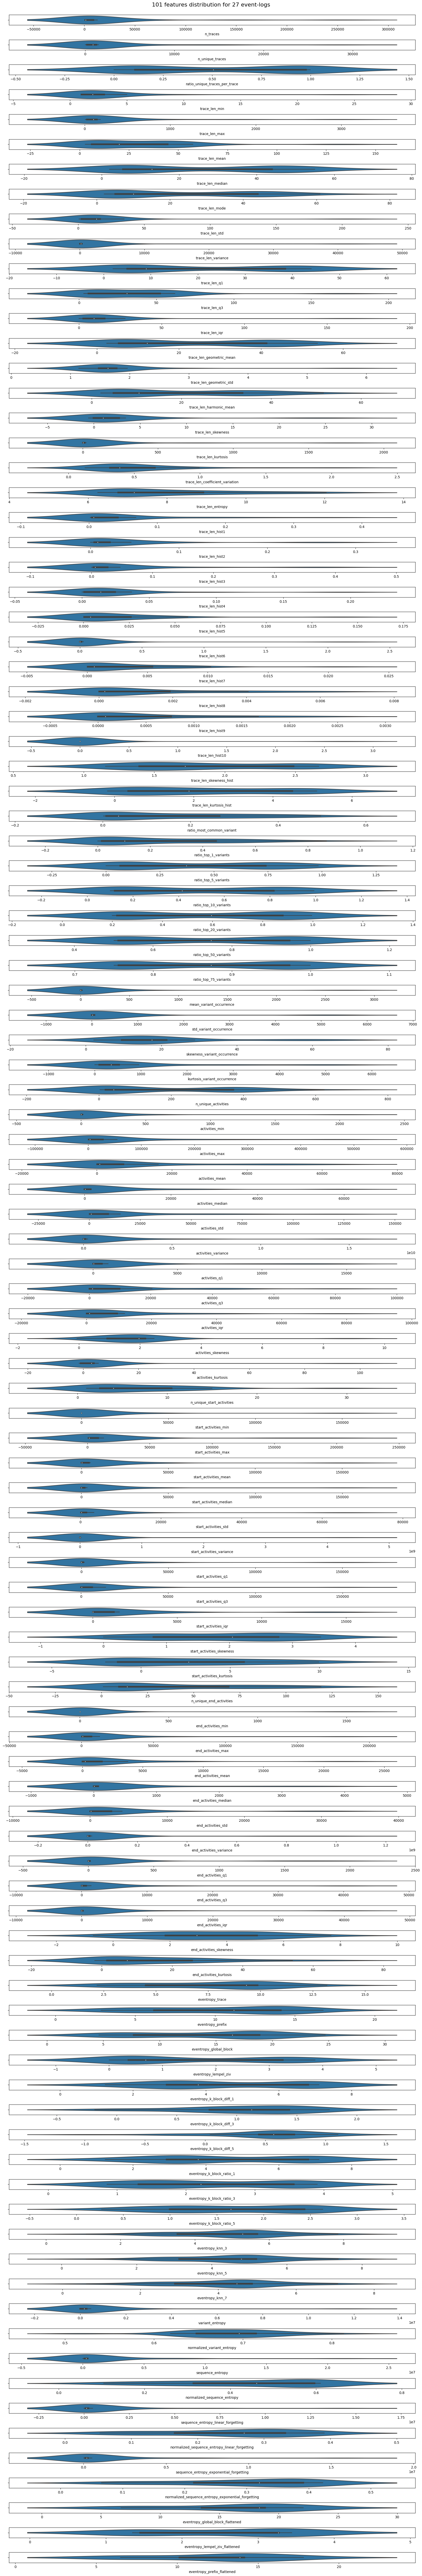

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

print(len(benchmark_features), benchmark_features['log'].unique())

columns = benchmark_features.columns[3:]
dmf1=benchmark_features.select_dtypes(exclude=['object'])

fig, axes = plt.subplots(len(dmf1.columns),1, figsize=(17,len(dmf1.columns)))
for i, ax in enumerate(axes):
        sns.violinplot(data=benchmark_features, x=dmf1.columns[i], ax=ax)
fig.suptitle(f"{len(columns)} features distribution for {len(benchmark_features)} event-logs", fontsize=16, y=1)
fig.tight_layout()

### Concatinating multiple features (Dataframe and dictionaries)

In [13]:
import json
from feeed.utils.sort_alphanumeric import sort_files
path = "../tag/output/features/real_event_logs_feb/"
combined_features = pd.DataFrame()

file_names = tqdm(sort_files(os.listdir(path)))

combined_results = []
for file in file_names:
    f = open(path+file, 'r')
    combined_results.append(json.load(f))

new_features = pd.DataFrame(combined_results)
new_features = new_features.set_index('log')

result = pd.concat([df.reset_index(), new_features.reset_index()], axis=1, join="inner").drop(['index'], axis=1)
result.shape
result.head()
#result.to_csv("../tag/data/benchmark_features.csv")

100%|███████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 2255.58it/s]


,log,accumulated_time_time_min,accumulated_time_time_max,accumulated_time_time_mean,accumulated_time_time_median,accumulated_time_time_mode,accumulated_time_time_std,accumulated_time_time_variance,accumulated_time_time_q1,accumulated_time_time_q3,...,eventropy_knn_5,eventropy_knn_7,variant_entropy,normalized_variant_entropy,sequence_entropy,normalized_sequence_entropy,sequence_entropy_linear_forgetting,normalized_sequence_entropy_linear_forgetting,sequence_entropy_exponential_forgetting,normalized_sequence_entropy_exponential_forgetting
0,BPIC15_2,0.0,1.145628e+08,7.195987e+06,3888000.00,0.0,1.090649e+07,1.189515e+14,691200.000,8380800.000,...,5.616,5.335,4.749288e+05,0.708280,1.384057e+06,0.423074,7.397790e+05,0.226133,9.014471e+05,0.275551
1,Receipt_WABO_CoSeLoG,0.0,2.383254e+07,2.379880e+05,130.27,0.0,9.204637e+05,8.472534e+11,33.736,10406.875,...,2.644,2.386,3.502264e+03,0.705383,1.823159e+04,0.310940,1.679949e+04,0.286515,1.690901e+04,0.288383
2,BPIC15_3,0.0,1.306368e+08,4.338386e+06,2371126.00,0.0,7.671908e+06,5.885817e+13,897372.000,4698477.000,...,4.371,4.083,8.867742e+04,0.717846,2.940925e+05,0.404651,2.842417e+05,0.391097,2.846260e+05,0.391625
3,BPI_Challenge_2019,0.0,2.217935e+09,3.151367e+06,682320.00,0.0,2.334700e+07,5.450824e+14,480.000,2899680.000,...,6.579,6.297,2.602767e+06,0.741706,7.768787e+06,0.461565,3.903568e+06,0.231922,4.888915e+06,0.290464
4,RequestForPayment,0.0,3.507780e+07,5.049570e+05,132234.00,0.0,1.227825e+06,1.507555e+12,10.000,607301.250,...,0.648,0.618,4.232263e+01,0.813479,2.481151e+05,0.105130,1.243092e+05,0.052672,1.557649e+05,0.066000


### References
| Benchmark event-log                             | Challenge URL |
|----------------------------------------|-------------------------------------------------------|
| 'BPIC15_1'                             | https://www.win.tue.nl/bpi/2015/challenge.html        |
| 'BPIC15_2'                             | https://www.win.tue.nl/bpi/2015/challenge.html        |
| 'BPIC15_3'                             | https://www.win.tue.nl/bpi/2015/challenge.html        |
| 'BPIC15_4'                             | https://www.win.tue.nl/bpi/2015/challenge.html        |
| 'BPIC15_5'                             | https://www.win.tue.nl/bpi/2015/challenge.html        |
| 'BPI_Challenge_2012'                   | https://www.win.tue.nl/bpi/2012/challenge.html        |
| 'BPI_Challenge_2013_closed_problems'   | https://www.win.tue.nl/bpi/2013/challenge.html        |
| 'BPI_Challenge_2013_incidents'         | https://www.win.tue.nl/bpi/2013/challenge.html        |
| 'BPI_Challenge_2017'                   | https://www.win.tue.nl/bpi/2017/challenge.html        |
| 'BPI_Challenge_2017_Offer_log'         | https://www.win.tue.nl/bpi/2017/challenge.html        |
| 'BPI_Challenge_2018'                   | https://www.win.tue.nl/bpi/2018/challenge.html        |
| 'BPI_Challenge_2019'                   | https://icpmconference.org/2019/icpm-2019/contests-challenges/bpi-challenge-2019/ |
| 'CoSeLoG_WABO_2'                       | -                                                     |
| 'CoSeLoG_WABO_3'                       | -                                                     |
| 'DomesticDeclarations'                 | https://icpmconference.org/2020/bpi-challenge/        |
| 'Hospital_log'                         | https://www.win.tue.nl/bpi/2011/challenge.html        |
| 'InternationalDeclarations'            | https://icpmconference.org/2020/bpi-challenge/        |
| 'PermitLog'                            | https://icpmconference.org/2020/bpi-challenge/        |
| 'PrepaidTravelCost'                    | https://icpmconference.org/2020/bpi-challenge/        |
| 'Receipt_WABO_CoSeLoG'                 | -                                                     |
| 'RequestForPayment'                    | https://icpmconference.org/2020/bpi-challenge/        |
| 'Road_Traffic_Fine_Management_Process' | -                                                     |
| 'Sepsis_Cases_Event_Log'               | https://data.4tu.nl/articles/dataset/Sepsis_Cases_-_Event_Log/12707639 |